# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import sys
import csv
from datetime import datetime

# Used to navigate to project root for api_keys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List to holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save query information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Add weather detail columns
city_name = []
city_id = []
lat = []
lon = []
unix_dt = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []

for city in cities:
    try:
        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
        # Get weather data
        weather_response = requests.get(query_url).json()
        
        print(f"City Name:  {city}, City Number:  {weather_response['id']}")
        
        # cityID, cityName, lat, lon, unix_dt, temp, humidity, cloudiness, windSpeed
        city_id.append(weather_response['id'])
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        unix_dt.append(weather_response['dt'])
        temp_max.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        
    except:
        print("City not found")
        pass

City not found
City Name:  east london, City Number:  1006984
City Name:  cape town, City Number:  3369157
City Name:  toamasina, City Number:  1053384
City not found
City Name:  ushuaia, City Number:  3833367
City Name:  tasiilaq, City Number:  3424607
City Name:  tiznit, City Number:  2527087
City Name:  gat, City Number:  293842
City Name:  yakeshi, City Number:  2033536
City Name:  buraydah, City Number:  107304
City Name:  lumberton, City Number:  4477525
City Name:  hamilton, City Number:  4513583
City Name:  kapaa, City Number:  5848280
City Name:  victoria, City Number:  1819729
City Name:  vaini, City Number:  4032243
City Name:  ivanivka, City Number:  707453
City not found
City Name:  batesville, City Number:  4100525
City Name:  port alfred, City Number:  964432
City not found
City Name:  sorland, City Number:  3137469
City Name:  avera, City Number:  4231997
City Name:  hobart, City Number:  2163355
City Name:  praia da vitoria, City Number:  3372760
City Name:  bluff, Cit

City Name:  arlit, City Number:  2447513
City Name:  esna, City Number:  355449
City not found
City Name:  baykit, City Number:  1510689
City not found
City Name:  kota belud, City Number:  1736660
City Name:  kadaya, City Number:  2023324
City Name:  mancio lima, City Number:  3663516
City Name:  umm lajj, City Number:  100926
City Name:  cockburn town, City Number:  3576994
City Name:  thunder bay, City Number:  6166142
City not found
City Name:  lochgilphead, City Number:  2643825
City Name:  cabo san lucas, City Number:  3985710
City not found
City Name:  cilegon, City Number:  1627549
City Name:  usinsk, City Number:  863061
City Name:  port arthur, City Number:  1801722
City Name:  gao, City Number:  2457161
City Name:  waingapu, City Number:  1622318
City Name:  ostrovnoy, City Number:  556268
City Name:  tenenkou, City Number:  2449938
City Name:  severo-kurilsk, City Number:  2121385
City Name:  thinadhoo, City Number:  1337610
City Name:  riyadh, City Number:  108410
City Nam

City Name:  ankara, City Number:  323786
City Name:  vega de alatorre, City Number:  3514843
City Name:  bolgatanga, City Number:  2302821
City Name:  ilhabela, City Number:  3461425
City Name:  vardo, City Number:  777019
City Name:  plouzane, City Number:  2986626
City Name:  sechura, City Number:  3691954
City Name:  buala, City Number:  2109528
City Name:  mehamn, City Number:  778707
City not found
City Name:  fortuna, City Number:  5563839
City Name:  krasnoborsk, City Number:  542423
City Name:  peace river, City Number:  6100069
City not found
City Name:  poshekhonye, City Number:  506029
City Name:  lompoc, City Number:  5367788
City Name:  axim, City Number:  2303611
City Name:  guerrero negro, City Number:  4021858
City Name:  wasilla, City Number:  5877641
City not found
City Name:  yuci, City Number:  1785974
City Name:  lewiston, City Number:  4969398
City Name:  amarpur, City Number:  1278895
City Name:  west wendover, City Number:  5710035
City Name:  walvis bay, City N

City Name:  tooele, City Number:  5783695
City Name:  kiama, City Number:  2161515
City Name:  champerico, City Number:  3598787
City Name:  ericeira, City Number:  2268563
City Name:  vryheid, City Number:  942470
City Name:  alice springs, City Number:  2077895
City not found
City Name:  bara, City Number:  2347758
City not found
City Name:  kutum, City Number:  371745
City Name:  ust-karsk, City Number:  2013942
City Name:  tiarei, City Number:  4033356
City Name:  sawtell, City Number:  2150163
City Name:  elista, City Number:  563514
City Name:  kachhwa, City Number:  1268722
City Name:  longuenesse, City Number:  2997670
City Name:  stepnyak, City Number:  1518768
City Name:  ankazoabo, City Number:  1072879
City Name:  falesti, City Number:  618344
City Name:  nouadhibou, City Number:  2377457
City Name:  shakawe, City Number:  933077
City Name:  aitape, City Number:  2101169
City Name:  batemans bay, City Number:  2176639
City Name:  krabi, City Number:  1152633
City Name:  yen

In [4]:
# Print the city count to confirm sufficient dataset (500+)
len(city_name)

575

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Save data tp dataframe
city_weather_data = pd.DataFrame({
    'city_name':city_name,
    'city_id':city_id,
    'lat':lat,
    'lon':lon,
    'unix_dt':unix_dt,
    'temp_max':temp_max,
    'humidity':humidity,
    'cloudiness':cloudiness,
    'windspeed':windspeed
})

# write dataframe to the csv
city_weather_data.to_csv(output_data_file, sep=',', encoding='utf-8', index=False)

# Display dataframe
city_weather_data

,city_name,city_id,lat,lon,unix_dt,temp_max,humidity,cloudiness,windspeed
0,East London,1006984,-33.02,27.91,1579824026,20.14,78,61,5.81
1,Cape Town,3369157,-33.93,18.42,1579823927,20.00,68,0,8.70
2,Toamasina,1053384,-18.17,49.38,1579824026,24.00,83,75,8.20
3,Ushuaia,3833367,-54.80,-68.30,1579823296,10.00,71,75,5.10
4,Tasiilaq,3424607,65.61,-37.64,1579824027,-9.00,43,23,8.20
...,...,...,...,...,...,...,...,...,...
570,Monster,2750630,52.03,4.17,1579824095,5.00,86,90,2.10
571,Kitimat,5993072,54.05,-128.65,1579824095,1.00,100,90,2.10
572,Seymchan,2121373,62.88,152.43,1579824095,-31.34,97,100,0.29
573,Rock Sound,3571592,24.90,-76.20,1579824095,22.77,76,20,9.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

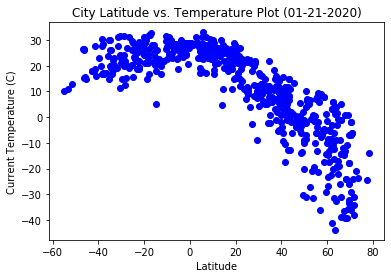

In [7]:
# Isolate data points to plot
lattitude = city_weather_data['lat']
temperature = city_weather_data['temp_max']

# Plot the lattitude vs tempretature (c) scatter plot
lattitude_vs_temperature_scatter = plt.scatter(lattitude, temperature, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(1579578485).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Temperature Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Current Temperature (C)")

# Save the plot and display it
plt.savefig("../output_data/lattitude_vs_temperature_scatter.png")
plt.show()

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Latitude vs. Humidity Plot

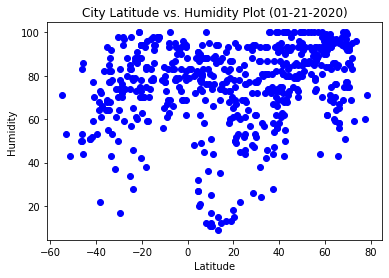

In [8]:
# Isolate data points to plot
lattitude = city_weather_data['lat']
humidity = city_weather_data['humidity']

# Plot the lattitude vs tempretature (c) scatter plot
lattitude_vs_humidity_scatter = plt.scatter(lattitude, humidity, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(1579578485).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Humidity Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the plot and display it
plt.savefig("../output_data/lattitude_vs_humidity_scatter.png")
plt.show()

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Latitude vs. Cloudiness Plot

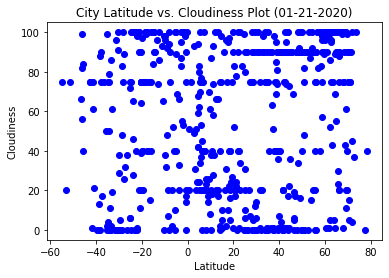

In [9]:
# Isolate data points to plot
lattitude = city_weather_data['lat']
cloudiness = city_weather_data['cloudiness']

# Plot the lattitude vs tempretature (c) scatter plot
lattitude_vs_cloudiness_scatter = plt.scatter(lattitude, cloudiness, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(1579578485).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Cloudiness Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the plot and display it
plt.savefig("../output_data/lattitude_vs_cloudiness_scatter.png")
plt.show()

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

#### Latitude vs. Wind Speed Plot

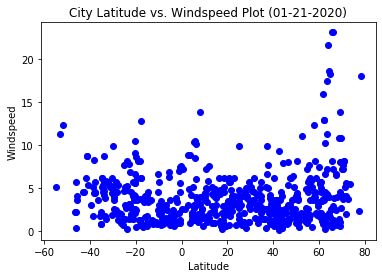

In [10]:
# Isolate data points to plot
lattitude = city_weather_data['lat']
windspeed = city_weather_data['windspeed']

# Plot the lattitude vs tempretature (c) scatter plot
lattitude_vs_windspeed_scatter = plt.scatter(lattitude, windspeed, marker="o", color="blue")

# Use timestamp for first city returned in dataset
date_time = datetime.utcfromtimestamp(1579578485).strftime('%m-%d-%Y')

# Print chart title, x-axis label, and y-axis label
plt.title(f"City Latitude vs. Windspeed Plot ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

# Save the plot and display it
plt.savefig("../output_data/lattitude_vs_windspeed_scatter.png")
plt.show()

<span style="color:red">*Add a sentence or two explaining what the code is and analyzing.*</span>.

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemi_weather_data = city_weather_data[city_weather_data['lat'] >= 0]
#north_hemi_weather_data

# Southern Hemisphere (less than 0 degrees latitude):
south_hemi_weather_data = city_weather_data[city_weather_data['lat'] < 0]
south_hemi_weather_data

,city_name,city_id,lat,lon,unix_dt,temp_max,humidity,cloudiness,windspeed
0,East London,1006984,-33.02,27.91,1579824026,20.14,78,61,5.81
1,Cape Town,3369157,-33.93,18.42,1579823927,20.00,68,0,8.70
2,Toamasina,1053384,-18.17,49.38,1579824026,24.00,83,75,8.20
3,Ushuaia,3833367,-54.80,-68.30,1579823296,10.00,71,75,5.10
13,Vaini,4032243,-21.20,-175.20,1579824028,29.00,74,20,4.10
...,...,...,...,...,...,...,...,...,...
560,Shakawe,933077,-18.37,21.85,1579824093,21.18,84,100,0.76
561,Aitape,2101169,-3.14,142.35,1579824093,27.62,73,83,1.14
562,Batemans Bay,2176639,-35.72,150.18,1579824024,23.89,64,50,1.79
568,Inhambane,1045114,-23.86,35.38,1579824094,25.50,65,46,5.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression